Here we import all of the modules needed for our model

In [96]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_squared_error

Here we import our data and combine it

In [97]:
df = pd.read_csv("student_info.csv")
df2 = pd.read_csv("student_scores.csv.xls")

frames = [df, df2]

data = pd.concat(frames)
data

data.fillna(0, inplace=True)
data["study_hours"] = data["Hours"] + data["study_hours"]
data["student_marks"] = data["Scores"] + data["student_marks"]
data.drop(columns=["Hours", "Scores"], inplace=True)
data.replace(0, np.nan, inplace=True)


data.rename(columns={"study_hours": "Hours", "student_marks": "Marks"}, inplace=True)
data1 = data.copy()
data1

,Hours,Marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
20,2.70,30.00
21,4.80,54.00
22,3.80,35.00
23,6.90,76.00


Normalisation formula: x - min / max - min 
Standardisation Formula: x - mean / Standard Deviation
Standard Deviation: root(x - mean / Number of Values)

In [95]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

data = std.fit_transform(data)

data = pd.DataFrame(data)

data.rename(columns={0: "Hours", 1: "Marks"}, inplace=True)
data

,Hours,Marks
0,0.037808,0.278201
1,-0.133759,0.138527
2,NaN,0.292486
3,-0.699295,-0.251924
4,1.207006,0.729759
...,...,...
220,-2.586533,-3.570757
221,-1.252122,-1.666118
222,-1.887556,-3.173957
223,0.082289,0.079801


In [59]:
from sklearn.preprocessing import MinMaxScaler

mmx = MinMaxScaler()

data = mmx.fit_transform(data)

data = pd.DataFrame(data)

data.rename(columns={0: "Hours", 1: "Marks"}, inplace=True)
data.describe()

,Hours,Marks
count,220.000000,225.000000
mean,0.700062,0.743519
std,0.194731,0.161909
min,0.000000,0.000000
25%,0.555864,0.707949
50%,0.717284,0.772692
75%,0.858642,0.836026
max,1.000000,1.000000


In [98]:
X = data["Hours"].values
y = data["Marks"].values
X

array([6.83, 6.56,  nan, 5.67, 8.67, 7.55, 6.67, 8.99, 5.19, 6.75, 6.59,
       8.56, 7.75, 7.9 , 8.19, 6.55, 6.36, 8.44, 8.41, 7.67, 7.42, 8.16,
       5.05, 5.85, 5.45, 7.96, 6.51, 6.73, 5.94, 7.48, 8.13,  nan, 5.4 ,
       8.78, 8.72, 7.1 , 7.86, 7.19, 5.62, 7.88, 5.28, 8.92, 5.46, 8.3 ,
       8.09, 6.18, 7.01, 5.01, 5.54, 5.09, 5.09, 7.31, 8.71, 5.52, 8.76,
       8.69, 5.75, 8.93, 5.39, 5.65, 5.49, 7.26, 6.35, 7.72, 8.88, 5.45,
       7.86, 8.26, 5.07, 8.25, 5.37, 5.11, 6.35, 7.41, 7.31, 6.04, 5.11,
       6.56, 5.09, 5.88, 8.34, 7.94, 6.66, 6.01, 6.88, 5.63, 5.88, 8.05,
       5.33, 8.79, 7.52, 8.2 , 5.44, 7.9 , 7.69, 6.09,  nan, 5.2 , 8.88,
       8.07, 6.24, 7.95, 8.26, 7.31, 7.23, 6.46, 5.34, 5.72, 5.84, 5.02,
       7.98, 6.37, 6.92, 7.95, 7.12, 5.79, 5.4 , 8.83, 5.69, 6.6 , 6.52,
       8.31,  nan, 7.62, 8.69, 8.75, 6.46, 7.14, 6.38, 6.33, 5.64, 5.26,
       6.83, 5.76, 6.51, 8.33, 8.16, 5.14, 8.71, 8.6 , 8.6 , 7.43, 7.81,
       6.51, 8.11, 8.95, 7.99, 5.92, 8.3 , 8.97, 5.

In [99]:
from sklearn.impute import SimpleImputer

missingValues = SimpleImputer(missing_values=np.nan, strategy='mean')

X = missingValues.fit_transform(X.reshape(-1, 1))

X

array([[6.83  ],
       [6.56  ],
       [6.7705],
       [5.67  ],
       [8.67  ],
       [7.55  ],
       [6.67  ],
       [8.99  ],
       [5.19  ],
       [6.75  ],
       [6.59  ],
       [8.56  ],
       [7.75  ],
       [7.9   ],
       [8.19  ],
       [6.55  ],
       [6.36  ],
       [8.44  ],
       [8.41  ],
       [7.67  ],
       [7.42  ],
       [8.16  ],
       [5.05  ],
       [5.85  ],
       [5.45  ],
       [7.96  ],
       [6.51  ],
       [6.73  ],
       [5.94  ],
       [7.48  ],
       [8.13  ],
       [6.7705],
       [5.4   ],
       [8.78  ],
       [8.72  ],
       [7.1   ],
       [7.86  ],
       [7.19  ],
       [5.62  ],
       [7.88  ],
       [5.28  ],
       [8.92  ],
       [5.46  ],
       [8.3   ],
       [8.09  ],
       [6.18  ],
       [7.01  ],
       [5.01  ],
       [5.54  ],
       [5.09  ],
       [5.09  ],
       [7.31  ],
       [8.71  ],
       [5.52  ],
       [8.76  ],
       [8.69  ],
       [5.75  ],
       [8.93  ],
       [5.39  

In [100]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

x_train

array([[6.18  ],
       [8.75  ],
       [5.88  ],
       [7.88  ],
       [5.05  ],
       [8.83  ],
       [6.7705],
       [8.09  ],
       [7.96  ],
       [8.3   ],
       [7.52  ],
       [3.3   ],
       [5.79  ],
       [7.3   ],
       [8.25  ],
       [8.34  ],
       [8.99  ],
       [8.79  ],
       [8.71  ],
       [7.01  ],
       [7.86  ],
       [7.53  ],
       [8.56  ],
       [2.7   ],
       [7.9   ],
       [8.69  ],
       [8.76  ],
       [5.2   ],
       [6.73  ],
       [5.26  ],
       [8.2   ],
       [8.6   ],
       [8.42  ],
       [8.88  ],
       [7.7   ],
       [1.1   ],
       [7.31  ],
       [8.93  ],
       [7.55  ],
       [5.39  ],
       [5.55  ],
       [5.22  ],
       [6.88  ],
       [5.28  ],
       [8.11  ],
       [8.26  ],
       [7.75  ],
       [5.75  ],
       [8.92  ],
       [8.26  ],
       [6.92  ],
       [7.79  ],
       [7.8   ],
       [8.44  ],
       [5.62  ],
       [7.19  ],
       [6.56  ],
       [7.94  ],
       [8.95  

In [101]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

acc_check = pd.DataFrame({"Test Values" : y_test, "Predicted Values" : y_pred})

acc_check

,Test Values,Predicted Values
0,83.08,86.727689
1,70.96,65.330296
2,60.00,65.699217
3,76.83,75.073488
4,81.25,83.112268
5,83.37,87.022826
6,81.74,84.514166
7,71.10,65.404080
8,84.35,89.900406
9,82.18,79.865767


In [102]:
from math import sqrt

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_test = sqrt(mse_test)
rmse_train = sqrt(mse_train)

print(rmse_test)
print(rmse_train)

6.062551394253286
6.22071233476187


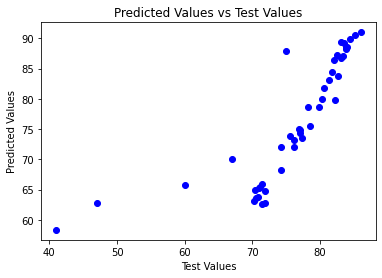

In [103]:
# plt.scatter(x_test, y_test, c="blue", label="Test Values")
# plt.scatter(x_test, y_pred, c='red', label="Pred Values")
plt.scatter(y_test, y_pred, c="blue", label="Values")
plt.title("Predicted Values vs Test Values")
plt.xlabel("Test Values")
plt.ylabel("Predicted Values")
plt.plot()
plt.show()

In [104]:
# data = missingValues.inverse_transform(data)

# Y = model.predict([[7]])

# predicted = Y * data1["Marks"].std() + data1["Marks"].mean()

# Y

Y = model.predict([[7]])
Y

array([76.76683385])